In [233]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os

INPUT_DATA_ROOT = "../Attachments"

In [254]:
#Import hourly corrolations 12 months* 24 hours
Hourly_corr_months_raw2019 = pd.read_excel(f"{INPUT_DATA_ROOT}/Analysis data.xlsx", sheet_name="Hourly corr, months, raw")
Hourly_corr_months_raw2019.columns = Hourly_corr_months_raw2019.iloc[0]
Hourly_corr_months_raw2019=Hourly_corr_months_raw2019.drop(Hourly_corr_months_raw2019.index[0])
Hourly_corr_months_raw2019.name='raw correlations 2019'
#2021 cut off
raw_correlations_hourly_by_month2021 =pd.read_csv('./raw_correlations_hourly_by_month.csv') #raw
return_correlations_hourly_by_month2021=pd.read_csv('./return_correlations_hourly_by_month.csv') #returns
raw_correlations_hourly_by_month2021.name='raw correlations 2021'
return_correlations_hourly_by_month2021.name='returns correlations 2021'




## Corrolation analysis

In [182]:
DE_corr_col=[k for k in Hourly_corr_months_raw2019.columns if 'DE' in k]
FR_corr_col=[k for k in Hourly_corr_months_raw2019.columns if 'FR' in k]
CZ_corr_col=[k for k in Hourly_corr_months_raw2019.columns if 'CZ' in k]
NL_corr_col=[k for k in Hourly_corr_months_raw2019.columns if 'NL' in k]

In [270]:
Hour_df_mean2019= Hourly_corr_months_raw2019.groupby(by='Hour').mean()
Hour_df_mean2021= raw_correlations_hourly_by_month2021.groupby(by='Hour').mean()
Hour_df_mean_return2021= return_correlations_hourly_by_month2021.groupby(by='Hour').mean()
Hour_df_mean2019.name='Monthly mean  Corrolations of raw hourly prices starting from 2019'
Hour_df_mean2021.name='Monthly mean  Corrolations of raw hourly prices starting from 2021'
Hour_df_mean_return2021.name='Monthly mean  Corrolations of log returns hourly prices starting from 2021'

In [408]:
if not os.path.exists("images_Monthly_Mean_Corrolations"):
    os.mkdir("images_Monthly_Mean_Corrolations")
    
def plot_mean_corr_month_country(df1,df2,Country):
    if not os.path.exists("images_Monthly_Mean_Corrolations/"+Country):
        os.mkdir("images_Monthly_Mean_Corrolations/"+Country)
    
    corr_col=[k for k in df1.columns if Country in k]
    fig = px.line(df1, x=df1.index, y=corr_col,
              title=df1.name+ ' for '+ Country, markers=True)
    fig.update_layout(
        width = 900,
        height = 350,
        xaxis= dict( range=[0, 25] ),
        yaxis= dict( range=[-1, 1] )
            )
    fig.add_hrect(
            y0=0.8,
            y1=1,
            fillcolor="red",
            opacity=0.1,
            line_width=0,
        )

    fig.add_vrect(
            x0=8,
            x1=20,
            fillcolor="blue",
            opacity=0.03,
            line_width=0,
        )
    fig.show()
    fig.write_image("images_Monthly_Mean_Corrolations/"+Country+"/"+df1.name+".png")
    
    corr_col=[k for k in df2.columns if Country in k]
    fig = px.line(df2, x=df2.index, y=corr_col,
                  title=df2.name+ ' for '+ Country,markers=True)
    fig.update_layout(
        width = 900, height = 350, xaxis= dict( range=[0, 25] )
            )
    fig.add_hrect(
            y0=0.8,
            y1=1,
            fillcolor="red",
            opacity=0.1,
            line_width=0,
        )

    fig.add_vrect(
            x0=8,
            x1=20,
            fillcolor="blue",
            opacity=0.04,
            line_width=0,
        )

    fig.show()
    fig.write_image("images_Monthly_Mean_Corrolations/"+Country+"/"+df2.name+".png")

In [409]:
plot_mean_corr_month_country(Hour_df_mean2019,Hour_df_mean2021, 'DE')

In [411]:
plot_mean_corr_month_country(Hour_df_mean2021,Hour_df_mean_return2021, 'DE')

In [410]:
plot_mean_corr_month_country(Hour_df_mean2019,Hour_df_mean2021, 'CZ')

In [413]:
plot_mean_corr_month_country(Hour_df_mean2021,Hour_df_mean_return2021, 'CZ')

In [412]:
plot_mean_corr_month_country(Hour_df_mean2019,Hour_df_mean2021, 'NL')

In [414]:
plot_mean_corr_month_country(Hour_df_mean2021,Hour_df_mean_return2021, 'NL')

In [256]:
if not os.path.exists("images_monthly_corr_ByCountry"):
    os.mkdir("images_monthly_corr_ByCountry")
def plot_monthly_corr_country(data, Country):
    print(data.name)
    if not os.path.exists("images_monthly_corr_ByCountry/"+Country+" "+data.name):
        os.mkdir("images_monthly_corr_ByCountry/"+Country+" "+data.name)
    corr_col=[k for k in data.columns if Country in k]
    for i in range(1,13):
        Hour_df_Month=data[data['Month']==i]
        fig = px.line(Hour_df_Month, x=Hour_df_Month.Hour, y=corr_col,
                          title='Hourly corrolations in the month '+ str(i)+' in '+ Country , markers=True)

        fig.update_layout(
        width = 900,
        height = 400,
        xaxis= dict (  range=[0, 25]    ), # count of the corr that stays within the 08 1 corr and at what hours , low corr or divergent lines represent risks
        yaxis= dict (  range=[-1, 1]    )
        )


        fig.add_hrect(
            y0=0.8,
            y1=1,
            fillcolor="red",
            opacity=0.1,
            line_width=0,
        )



        fig.add_vrect(
            x0=8,
            x1=20,
            fillcolor="blue",
            opacity=0.04,
            line_width=0,
        )

        fig.show()
        fig.write_image("images_monthly_corr_ByCountry/"+Country+" "+data.name+"/"+str(i)+".png")

In [257]:
#includig 2019 data
plot_monthly_corr_country(Hourly_corr_months_raw2019, 'DE')

raw correlations 2019


In [258]:
#From 2021
plot_monthly_corr_country(raw_correlations_hourly_by_month2021,'DE')

raw correlations 2021


In [259]:
#From 2021
plot_monthly_corr_country(return_correlations_hourly_by_month2021,'DE')

returns correlations 2021


In [415]:
#From 2021
plot_monthly_corr_country(return_correlations_hourly_by_month2021,'NL')

returns correlations 2021


In [416]:
#From 2021
plot_monthly_corr_country(raw_correlations_hourly_by_month2021,'NL')

raw correlations 2021


In [264]:
if not os.path.exists("images_hourly_corr_byMonths"):
    os.mkdir("images_hourly_corr_byMonths")
def plot_country_corr_bymonth(data,Country):
    corr_col=[k for k in data.columns if Country in k]
    print(data.name)
    if not os.path.exists("images_hourly_corr_byMonths/"+data.name):
        os.mkdir("images_hourly_corr_byMonths/"+data.name)
    if not os.path.exists("images_hourly_corr_byMonths/"+data.name+'/'+Country):
        os.mkdir("images_hourly_corr_byMonths/"+data.name+'/'+Country)
        
    for county_corr in corr_col:

        corr_df=data[['Month',county_corr]]
        Hour_df_corr=pd.DataFrame()
        Hour_df_corr['Hour']=range(1,25)
        for i in range (1,13):
            df1=corr_df[corr_df['Month']==i].add_suffix('_'+str(i)).iloc[:,-1:].reset_index(level=None, drop=True)
            Hour_df_corr = pd.concat([Hour_df_corr, df1], axis=1)

        fig = px.line(Hour_df_corr, x=Hour_df_corr.Hour, y=Hour_df_corr.columns[1:],
                          title=county_corr+ ' Hourly corrolations by months' , markers=True)


        fig.update_layout(
        width = 900,
        height = 450,
        xaxis= dict (  range=[0, 25]    ),
        yaxis= dict (  range=[-1, 1]    )              
        )


        fig.add_hrect(
            y0=0.8,
            y1=1,
            fillcolor="red",
            opacity=0.1,
            line_width=0,
        )



        fig.add_vrect(
            x0=8,
            x1=20,
            fillcolor="blue",
            opacity=0.04,
            line_width=0,
        )

        fig.show()
        fig.write_image("images_hourly_corr_byMonths/"+data.name+'/'+Country+'/'+county_corr+".png")

In [265]:
plot_country_corr_bymonth(raw_correlations_hourly_by_month2021,'DE')

raw correlations 2021


In [266]:
plot_country_corr_bymonth(raw_correlations_hourly_by_month2021,'NL')

raw correlations 2021


In [268]:
plot_country_corr_bymonth(return_correlations_hourly_by_month2021,'DE')

returns correlations 2021


In [267]:
plot_country_corr_bymonth(return_correlations_hourly_by_month2021,'NL')

returns correlations 2021


## P 0.95?

In [15]:
data=raw_correlations_hourly_by_month2021['DE_NL']

In [16]:
np.mean(data)

0.7175564706465696

In [17]:
#create 95% confidence interval for population mean weight
import scipy.stats as st

st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(0.6873943712657431, 0.7477185700273961)

## Price data

widths: 
The widths for each peak in samples.

width_height:
The height of the contour lines at which the widths where evaluated.

left_ips, right_ipsndarray
Interpolated positions of left and right intersection points of a horizontal line at the respective evaluation height.

In [18]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

In [393]:
hourly_power = pd.read_excel(f"{INPUT_DATA_ROOT}/Analysis data.xlsx", sheet_name="Data")
hourly_power["datetime"] = pd.Series(dt.datetime(row.Year, row.Month, row.Day, row.Hour) for row in hourly_power.itertuples() )
hourly_power.set_index("datetime", inplace=True)
hourly_power2021=hourly_power[hourly_power.index >= dt.datetime(2021,5,1,0)]


In [394]:
#ADD log return
return_hourly_power2021 = np.log(hourly_power2021[['NL', 'BE', 'AT', 'DE', 'FR', 'CZ','UK']]) - np.log(hourly_power2021[['NL', 'BE', 'AT', 'DE', 'FR', 'CZ','UK']].shift(1))
return_hourly_power2021.columns=['NL_return', 'BE_return', 'AT_return', 'DE_return', 'FR_return', 'CZ_return','UK_return']
hourly_power2021 = pd.concat([hourly_power2021, return_hourly_power2021], axis=1)
hourly_power2021.name='hourly power prices since 2021'
hourly_power2021.head(3)

Year  Month  Day  Hour     NL     BE     AT     DE  \
datetime                                                                  
2021-05-01 00:00:00  2021      5    1     0  69.29  69.29  69.29  69.29   
2021-05-01 01:00:00  2021      5    1     1  64.60  64.60  64.60  64.60   
2021-05-01 02:00:00  2021      5    1     2  61.08  61.08  61.08  61.08   

                        FR     CZ  ...  UK_baseload  UK_detrended  UK_ratio  \
datetime                           ...                                        
2021-05-01 00:00:00  69.29  67.10  ...    73.789597     -6.189597 -0.083882   
2021-05-01 01:00:00  64.60  64.45  ...    73.789597     -9.989597 -0.135379   
2021-05-01 02:00:00  61.08  63.13  ...    73.789597     -9.189597 -0.124538   

                     NL_return  BE_return  AT_return  DE_return  FR_return  \
datetime                                                                     
2021-05-01 00:00:00        NaN        NaN        NaN        NaN        NaN   
2021-05-01 01:00:00  -0.070086  -0.070086  -0.070086  -0.070086  -0.070086   
2021-05-01 02:00:00  -0.056030  -0.056030  -0.056030  -0.056030  -0.056030   

                     CZ_return  UK_return  
datetime                                   
2021-05-01 00:00:00        NaN        NaN  
2021-05-01 01:00:00  -0.040294  -0.057855  
2021-05-01 02:00:00  -0.020694   0.012461  

[3 rows x 39 columns]

In [398]:
if not os.path.exists("images_monthly_H_Prices_country"):
    os.mkdir("images_monthly_H_Prices_country")
def plot_monthly_H_Prices_country(data, type_price):
    print(data.name)
    if not os.path.exists("images_monthly_H_Prices_country/"+type_price):
        os.mkdir("images_monthly_H_Prices_country/"+type_price)
    
    if type_price == 'raw':
        col=['NL', 'BE', 'AT', 'DE', 'FR', 'CZ','UK']
    elif type_price == 'baseload':
        col=['NL_baseload', 'BE_baseload', 'AT_baseload', 'DE_baseload', 'FR_baseload', 'CZ_baseload','UK_baseload']
    elif type_price == 'detrended':
        col=['NL_detrended', 'BE_detrended', 'AT_detrended', 'DE_detrended', 'FR_detrended', 'CZ_detrended','UK_detrended']
    elif type_price=='ratio':
        col=['NL_ratio', 'BE_ratio', 'AT_ratio', 'DE_ratio', 'FR_ratio', 'CZ_ratio','UK_ratio']
    elif type_price=='return':
        col=['NL_return', 'BE_return', 'AT_return', 'DE_return', 'FR_return', 'CZ_return','UK_return']
    else:
        print('enter either:  raw or baseload or detrended or return')
        col=[]
         
                
                

    for i in range(1,13):
        data1=data.groupby(by=['Month','Hour']).mean().reset_index()
        Hour_df_Month=data1[data1['Month']==i]
        fig = px.line(Hour_df_Month, x=Hour_df_Month.Hour, y=col,
                          title=data.name + ' in the month '+ str(i)+'  '+ type_price , markers=True)

        fig.update_layout(
        width = 900,
        height = 400,
        xaxis= dict (  range=[0, 25]    ), # count of the corr that stays within the 08 1 corr and at what hours , low corr or divergent lines represent risks
        yaxis= dict (  range=[data1[col].min().min()-10, data1[col].max().max()+10]    )
        )
        print(Hour_df_Month[col].min().min(), Hour_df_Month[col].min().min()>0)

        if Hour_df_Month[col].min().min()>0:
            print('green')
            fig.add_hrect(
                y0=0,
                y1=Hour_df_Month[col].min().min(),
                fillcolor="green",
                opacity=0.1,
                line_width=0,
            )
        else:
            print('red')
        
            fig.add_hrect(
                y0=0,
                y1=Hour_df_Month[col].min().min(),
                fillcolor="red",
                opacity=0.1,
                line_width=0,
            )



        fig.add_vrect(
            x0=8,
            x1=20,
            fillcolor="blue",
            opacity=0.04,
            line_width=0,
        )

        fig.show()
        fig.write_image("images_monthly_H_Prices_country/"+type_price+"/"+str(i)+".png")

In [388]:
plot_monthly_H_Prices_country(hourly_power2021,'raw')

hourly power prices since 2021
28.187419354838706 True
green


28.187419354838706 True
green


28.187419354838706 True
green


28.187419354838706 True
green


28.187419354838706 True
green


28.187419354838706 True
green


28.187419354838706 True
green


28.187419354838706 True
green


28.187419354838706 True
green


28.187419354838706 True
green


28.187419354838706 True
green


28.187419354838706 True
green


In [389]:
plot_monthly_H_Prices_country(hourly_power2021,'detrended')

hourly power prices since 2021
-97.89346774193507 False
green


-97.89346774193507 False
green


-97.89346774193507 False
green


-97.89346774193507 False
green


-97.89346774193507 False
green


-97.89346774193507 False
green


-97.89346774193507 False
green


-97.89346774193507 False
green


-97.89346774193507 False
green


-97.89346774193507 False
green


-97.89346774193507 False
green


-97.89346774193507 False
green


In [399]:
plot_monthly_H_Prices_country(hourly_power2021,'return')

hourly power prices since 2021
-0.20436865519976413 False
red


-0.26610475765763464 False
red


-0.5798532222451623 False
red


-0.6085074668002571 False
red


-0.7041068764692555 False
red


-0.29526605052324456 False
red


-0.3475995654061982 False
red


-0.32614561896149696 False
red


-0.39053432279106864 False
red


-0.36857923857545316 False
red


-0.2756168918229154 False
red


-inf False
red


In [403]:
data1=hourly_power2021.groupby(by=['Month','Hour']).mean().reset_index()
Hour_df_Month=data1[data1['Month']==12]

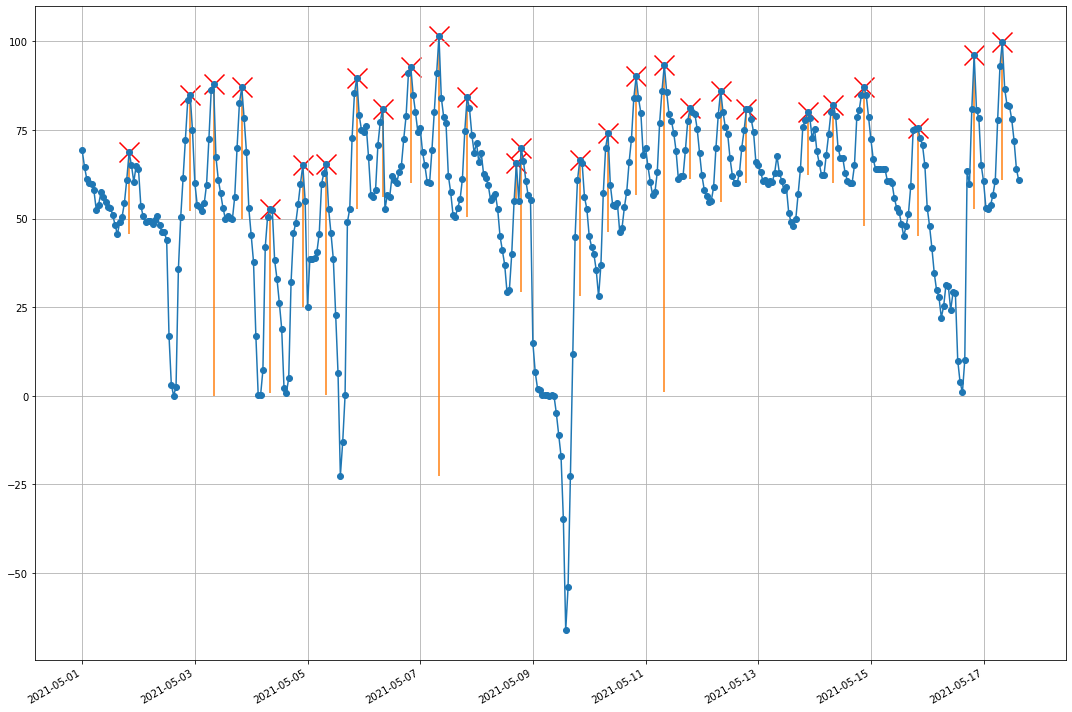

In [23]:
ts = hourly_power2021['NL'].index[:400]
ys = hourly_power2021['NL'].values[:400]
df = pd.DataFrame({'Timestamp':ts, 'Value':ys})

idx, properties = find_peaks(df['Value'], prominence=10, width=1)
# introduce some shorthands:
l = properties["left_ips"]
r = properties["right_ips"]
p = properties["prominences"]
w = properties["widths"]
wh = properties["width_heights"]

peak_x = df['Timestamp'][idx].values
peak_y = df['Value'][idx].values

fig,ax = plt.subplots(figsize=(15,10))    
ax.plot(df['Timestamp'],df['Value'], marker="o")

ax.scatter(peak_x, peak_y, marker="x", s=20**2,color="r")

ax.vlines(x=peak_x, ymin=peak_y - p, ymax = peak_y, color = "C1")


fig.autofmt_xdate()
ax.grid()
plt.tight_layout()
plt.show()

In [21]:
import datetime
ts = hourly_power2021['NL'].index[:400]
ys = hourly_power2021['NL'].values[:400]
df = pd.DataFrame({'Timestamp':ts, 'Value':ys})

idx, properties = find_peaks(df['Value'], prominence=0.1, width=0.1)
# introduce some shorthands:
l = properties["left_ips"]
r = properties["right_ips"]
p = properties["prominences"]
w = properties["widths"]
wh = properties["width_heights"]

peak_x = df['Timestamp'][idx].values
peak_y = df['Value'][idx].values


fig = px.line(df,df['Timestamp'],df['Value'], title=' NL Hourly Power' , markers=False)
fig.add_hrect(
            y0=0,
            y1=100,
            fillcolor="red",
            opacity=0.1,
            line_width=0,
        )

fig.show()

In [46]:
from datetime import date
import calendar

ts = hourly_power2021['NL'].index
ys = hourly_power2021['NL'].values
df = pd.DataFrame({'Timestamp':ts, 'Value':ys})

idx, properties = find_peaks(df['Value'], prominence=20, width=0.1)

peak_x = df['Timestamp'][idx].values
peak_y = df['Value'][idx].values

peak_NL=pd.DataFrame()
peak_NL['Timestamps']=df['Timestamp'][idx].values
peak_NL['right_ips'] = properties["right_ips"]
peak_NL['right_ips'] = properties["right_ips"]
peak_NL['prominences'] = properties["prominences"]
peak_NL['Value'] = df['Value'][idx].values
peak_NL['widths'] = properties["widths"]
peak_NL['width_heights'] = properties["width_heights"]
peak_NL['days']=[calendar.day_name[my_date.weekday()] for my_date in peak_NL['Timestamps'] ]
peak_NL['hours']=[h.hour for h in peak_NL['Timestamps'] ]

In [423]:
peak_NL.head(5)

Timestamps  right_ips  prominences  Value     widths  \
0 2021-05-01 20:00:00  24.658584        23.16  68.69   6.248599   
1 2021-05-02 22:00:00  47.431742        32.70  84.90   3.780383   
2 2021-05-03 08:00:00  72.175603        87.92  87.93  30.619671   
3 2021-05-03 20:00:00  70.019377        37.21  87.00   4.139421   
4 2021-05-04 08:00:00  83.910635        51.93  52.80   6.346698   

   width_heights      days  hours  
0         57.110  Saturday     20  
1         68.550    Sunday     22  
2         43.970    Monday      8  
3         68.395    Monday     20  
4         26.835   Tuesday      8

In [27]:
# Create traces
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=peak_NL.index,y=peak_NL['prominences'],
                    mode='lines+markers',
                    name='Prominences'))
fig.add_trace(go.Scatter(x=peak_NL.index,y=peak_NL['widths'],
                    mode='lines+markers',
                    name='Width'))


fig.show()

In [427]:
peak_NL.groupby(['days']).count()

Timestamps  right_ips  prominences  Value  widths  width_heights  \
days                                                                          
Friday            120        120          120    120     120            120   
Monday            114        114          114    114     114            114   
Saturday          104        104          104    104     104            104   
Sunday             97         97           97     97      97             97   
Thursday          118        118          118    118     118            118   
Tuesday           109        109          109    109     109            109   
Wednesday         117        117          117    117     117            117   

           hours  
days              
Friday       120  
Monday       114  
Saturday     104  
Sunday        97  
Thursday     118  
Tuesday      109  
Wednesday    117

In [440]:
weekAvg=peak_NL.groupby(['days','hours']).size()/peak_NL.groupby('days')['hours'].size()
weekAvg_df=pd.DataFrame(weekAvg)
weekAvg_df.columns=['NL']
weekAvg_df

NL
days      hours          
Friday    0      0.058333
          1      0.008333
          2      0.025000
          3      0.008333
          7      0.066667
...                   ...
Wednesday 19     0.205128
          20     0.076923
          21     0.034188
          22     0.042735
          23     0.008547

[126 rows x 1 columns]

In [466]:
weekAvg_df=weekAvg_df.reset_index()

In [422]:
for day in ['Monday','Tuesday','Wednesday','Thursday', 'Friday',  'Saturday', 'Sunday']:
    day_df=weekAvg_df[weekAvg_df['days']==day][['hours',0]]
    fig =px.bar(day_df,x=day_df.hours,y=day_df[0],color="hours",title='Avg Count of the peak hours in '+ day )
    fig.update_layout(
        width = 600,
        height = 400,
        xaxis= dict (  range=[-1, 25]),
        yaxis= dict (  range=[0, 0.3])
        )


    fig.add_hrect(
            y0=0,
            y1=0.1,
            fillcolor="red",
            opacity=0.03,
            line_width=0,
        )



    fig.add_vrect(
            x0=8,
            x1=20,
            fillcolor="blue",
            opacity=0.08,
            line_width=0,
        )

    fig.show()

In [434]:
day_df=weekAvg_df[weekAvg_df['days']=='Monday'][['hours',0]]

In [449]:
df_peaks=pd.DataFrame()

for country in ['NL','DE','CZ']:
    print(country)
    ts = hourly_power2021[country].index
    ys = hourly_power2021[country].values
    df = pd.DataFrame({'Timestamp':ts, 'Value':ys})

    idx, properties = find_peaks(df['Value'], prominence=20, width=0.1)

    peak_x = df['Timestamp'][idx].values
    peak_y = df['Value'][idx].values

    peak_NL=pd.DataFrame()
    peak_NL['Timestamps']=df['Timestamp'][idx].values
    peak_NL['right_ips'] = properties["right_ips"]
    peak_NL['right_ips'] = properties["right_ips"]
    peak_NL['prominences'] = properties["prominences"]
    peak_NL['Value'] = df['Value'][idx].values
    peak_NL['widths'] = properties["widths"]
    peak_NL['width_heights'] = properties["width_heights"]
    peak_NL['days']=[calendar.day_name[my_date.weekday()] for my_date in peak_NL['Timestamps'] ]
    peak_NL['hours']=[h.hour for h in peak_NL['Timestamps'] ]
    weekAvg=peak_NL.groupby(['days','hours']).size()/peak_NL.groupby('days')['hours'].size()
    weekAvg_df=pd.DataFrame(weekAvg)
    weekAvg_df.columns=[country]
    df_peaks = pd.concat([df_peaks, weekAvg_df], axis=1)
df_peaks=df_peaks.reset_index()



NL
DE
CZ


In [451]:
df_peaks

days  hours        NL        DE        CZ
0       Friday      0  0.058333  0.040816  0.048077
1       Friday      1  0.008333       NaN       NaN
2       Friday      2  0.025000       NaN  0.028846
3       Friday      3  0.008333       NaN       NaN
4       Friday      6       NaN       NaN  0.009615
..         ...    ...       ...       ...       ...
137  Wednesday     19  0.205128  0.255102  0.207921
138  Wednesday     20  0.076923  0.071429  0.099010
139  Wednesday     21  0.034188       NaN       NaN
140  Wednesday     22  0.042735  0.010204       NaN
141  Wednesday     23  0.008547       NaN       NaN

[142 rows x 5 columns]

In [465]:
import plotly.graph_objects as go

for day in ['Monday','Tuesday','Wednesday','Thursday', 'Friday',  'Saturday', 'Sunday']:
    day_df=df_peaks[df_peaks['days']==day]
    
    

    fig = go.Figure(data=[
        go.Bar(name='NL', x=day_df.hours,y=day_df['NL'],text=day_df.hours,textposition='auto'),
        go.Bar(name='DE', x=day_df.hours,y=day_df['DE'],text=day_df.hours,textposition='auto'),
        go.Bar(name='CZ', x=day_df.hours,y=day_df['CZ'],text=day_df.hours,textposition='auto')
    ])
    
    fig.add_trace(
    go.Scatter(
        x=[0, 1, 2, 3, 4, 5],
        y=[1.5, 1, 1.3, 0.7, 0.8, 0.9]
    ))
    
    # Change the bar mode
    fig.update_layout(barmode='group',title='Avg Count of the peak hours in '+day)
    fig.show()

In [417]:
# Create traces
import plotly.graph_objects as go
fig =px.bar(peak_NL,x=peak_NL.Timestamps,y=peak_NL['prominences'],color="days")
fig.show()